In [184]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
car = pd.read_csv('quikr_car.csv')

In [138]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [139]:
car.shape

(892, 6)

In [140]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [141]:
backup=car.copy()

In [142]:
car['year'].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

In [143]:
car['Price'].unique()

array(['80,000', '4,25,000', 'Ask For Price', '3,25,000', '5,75,000',
       '1,75,000', '1,90,000', '8,30,000', '2,50,000', '1,82,000',
       '3,15,000', '4,15,000', '3,20,000', '10,00,000', '5,00,000',
       '3,50,000', '1,60,000', '3,10,000', '75,000', '1,00,000',
       '2,90,000', '95,000', '1,80,000', '3,85,000', '1,05,000',
       '6,50,000', '6,89,999', '4,48,000', '5,49,000', '5,01,000',
       '4,89,999', '2,80,000', '3,49,999', '2,84,999', '3,45,000',
       '4,99,999', '2,35,000', '2,49,999', '14,75,000', '3,95,000',
       '2,20,000', '1,70,000', '85,000', '2,00,000', '5,70,000',
       '1,10,000', '4,48,999', '18,91,111', '1,59,500', '3,44,999',
       '4,49,999', '8,65,000', '6,99,000', '3,75,000', '2,24,999',
       '12,00,000', '1,95,000', '3,51,000', '2,40,000', '90,000',
       '1,55,000', '6,00,000', '1,89,500', '2,10,000', '3,90,000',
       '1,35,000', '16,00,000', '7,01,000', '2,65,000', '5,25,000',
       '3,72,000', '6,35,000', '5,50,000', '4,85,000', '3,29,5

In [144]:
car['kms_driven'].unique()

array(['45,000 kms', '40 kms', '22,000 kms', '28,000 kms', '36,000 kms',
       '59,000 kms', '41,000 kms', '25,000 kms', '24,530 kms',
       '60,000 kms', '30,000 kms', '32,000 kms', '48,660 kms',
       '4,000 kms', '16,934 kms', '43,000 kms', '35,550 kms',
       '39,522 kms', '39,000 kms', '55,000 kms', '72,000 kms',
       '15,975 kms', '70,000 kms', '23,452 kms', '35,522 kms',
       '48,508 kms', '15,487 kms', '82,000 kms', '20,000 kms',
       '68,000 kms', '38,000 kms', '27,000 kms', '33,000 kms',
       '46,000 kms', '16,000 kms', '47,000 kms', '35,000 kms',
       '30,874 kms', '15,000 kms', '29,685 kms', '1,30,000 kms',
       '19,000 kms', nan, '54,000 kms', '13,000 kms', '38,200 kms',
       '50,000 kms', '13,500 kms', '3,600 kms', '45,863 kms',
       '60,500 kms', '12,500 kms', '18,000 kms', '13,349 kms',
       '29,000 kms', '44,000 kms', '42,000 kms', '14,000 kms',
       '49,000 kms', '36,200 kms', '51,000 kms', '1,04,000 kms',
       '33,333 kms', '33,600 kms', '5,

In [145]:
car['fuel_type'].unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

In [146]:
car['company'].unique()

array(['Hyundai', 'Mahindra', 'Maruti', 'Ford', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'I', 'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat',
       'Commercial', 'MARUTI', 'Force', 'Mercedes', 'Land', 'Yamaha',
       'selling', 'URJENT', 'Swift', 'Used', 'Jaguar', 'Jeep', 'tata',
       'Sale', 'very', 'Volvo', 'i', '2012', 'Well', 'all', '7', '9',
       'scratch', 'urgent', 'sell', 'TATA', 'Any', 'Tara'], dtype=object)

In [147]:
car['fuel_type'].unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

## Quality
- Year has many non-year values
- change year object to int
- names are pretty inconsistent
- names have company names attached to it
- some names are spam like 'Maruti Ertiga showroom condition with' and 'Well mentained Tata Sumo'
- company: many of the names are not of any company like 'Used', 'URJENT', and so on.
- year has many non-year values
- year is in object. Change to integer
- Price has Ask for Price
- Price has commas in its prices and is in object
- kms_driven has object values with kms at last.
- It has nan values and two rows have 'Petrol' in them
- fuel_type has nan values

## Cleaning the Data
 create a backup cop

In [148]:
backup=car.copy()

In [149]:
car['year']

0      2007
1      2006
2      2018
3      2014
4      2014
       ... 
887    zest
888    2018
889    2013
890    2014
891    2014
Name: year, Length: 892, dtype: object

In [150]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


Price has Ask for Price

In [151]:

car=car[car['Price']!='Ask For Price']

In [152]:
car['Price']

0        80,000
1      4,25,000
3      3,25,000
4      5,75,000
6      1,75,000
         ...   
887    3,10,000
888    2,60,000
889    3,90,000
890    1,80,000
891    1,60,000
Name: Price, Length: 857, dtype: object

In [153]:
car['kms_driven']

0      45,000 kms
1          40 kms
3      28,000 kms
4      36,000 kms
6      41,000 kms
          ...    
887           NaN
888    27,000 kms
889    40,000 kms
890        Petrol
891        Petrol
Name: kms_driven, Length: 857, dtype: object

In [154]:
mask = car['kms_driven'].astype(str).str.contains(r'\d')
car = car[mask].copy()

In [155]:
car.loc[:, 'kms_driven'] = (
    car['kms_driven']
      .str.replace('kms', '', regex=False)
      .str.replace(',', '', regex=False)
      .str.strip()
)

car.loc[:, 'kms_driven'] = pd.to_numeric(
    car['kms_driven'],
    errors='coerce'
)


In [156]:
car['kms_driven']

0       45000
1          40
3       28000
4       36000
6       41000
        ...  
883     50000
885     30000
886    132000
888     27000
889     40000
Name: kms_driven, Length: 817, dtype: object

In [157]:
car['fuel_type']

0      Petrol
1      Diesel
3      Petrol
4      Diesel
6      Diesel
        ...  
883    Petrol
885    Diesel
886    Petrol
888    Diesel
889    Diesel
Name: fuel_type, Length: 817, dtype: object

In [158]:
car.shape

(817, 6)

## name and company had spammed data...but with the previous cleaning, those rows got removed.

In [159]:
car['name']=car['name'].str.split().str.slice(start=0,stop=3).str.join(' ')

In [160]:
car=car.reset_index(drop=True)

In [161]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,"80,000",45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,"4,25,000",40,Diesel
2,Hyundai Grand i10,Hyundai,2014,"3,25,000",28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,"5,75,000",36000,Diesel
4,Ford Figo,Ford,2012,"1,75,000",41000,Diesel
...,...,...,...,...,...,...
812,Maruti Suzuki Ritz,Maruti,2011,"2,70,000",50000,Petrol
813,Tata Indica V2,Tata,2009,"1,10,000",30000,Diesel
814,Toyota Corolla Altis,Toyota,2009,"3,00,000",132000,Petrol
815,Tata Zest XM,Tata,2018,"2,60,000",27000,Diesel


In [162]:
car.to_csv('Cleaned_Car_data.csv')

In [163]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817 entries, 0 to 816
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    object
 3   Price       817 non-null    object
 4   kms_driven  817 non-null    object
 5   fuel_type   816 non-null    object
dtypes: object(6)
memory usage: 38.4+ KB


In [164]:
car.describe(include='all')

,name,company,year,Price,kms_driven,fuel_type
count,817,817,817,817,817,816
unique,254,25,21,272,247,3
top,Maruti Suzuki Swift,Maruti,2015,"2,50,000",45000,Petrol
freq,51,221,111,16,30,428


In [165]:
car=car[car['Price']<6000000]

TypeError: '<' not supported between instances of 'str' and 'int'

In [110]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,"80,000",45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,"4,25,000",40,Diesel
2,Hyundai Grand i10,Hyundai,2014,"3,25,000",28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,"5,75,000",36000,Diesel
4,Ford Figo,Ford,2012,"1,75,000",41000,Diesel
...,...,...,...,...,...,...
812,Maruti Suzuki Ritz,Maruti,2011,"2,70,000",50000,Petrol
813,Tata Indica V2,Tata,2009,"1,10,000",30000,Diesel
814,Toyota Corolla Altis,Toyota,2009,"3,00,000",132000,Petrol
815,Tata Zest XM,Tata,2018,"2,60,000",27000,Diesel


## Checking relationship of Company with Price

In [111]:
car['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

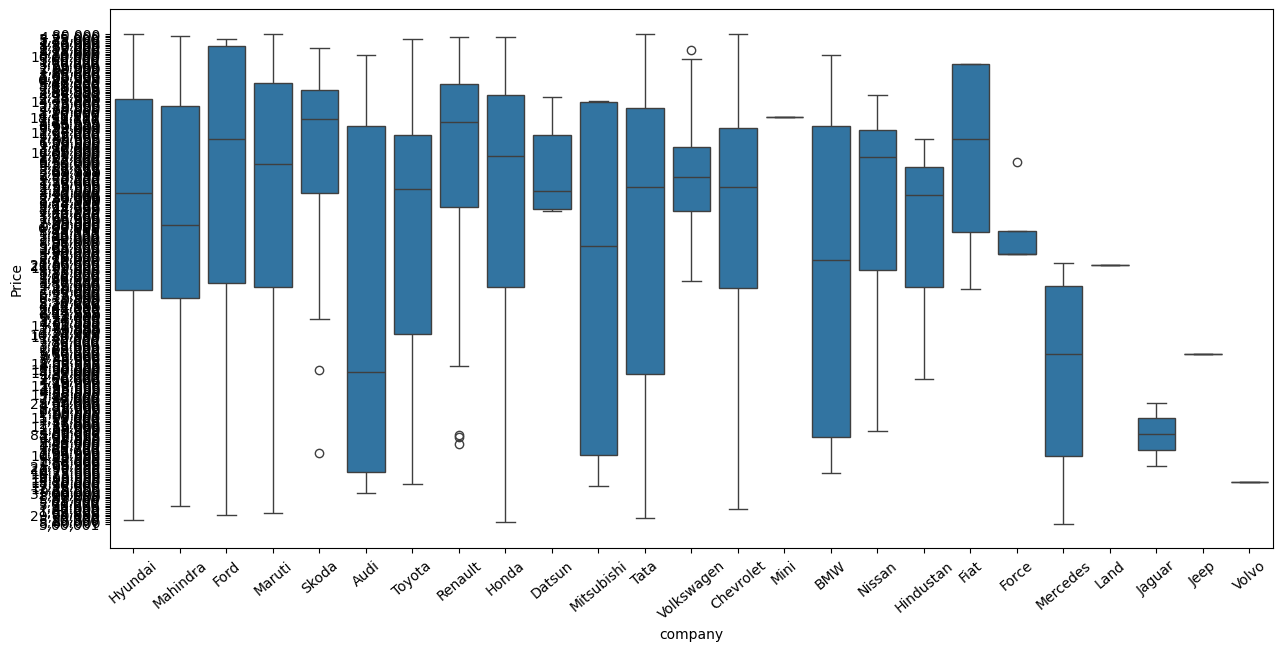

In [113]:
fig, ax = plt.subplots(figsize=(15,7))
sns.boxplot(x='company', y='Price', data=car, ax=ax)
ax.tick_params(axis='x', rotation=40)

# Show the plot
plt.show()


/var/folders/68/9x8njtw55xv1z1f2kw81nkzh0000gn/T/ipykernel_9242/2542042277.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')


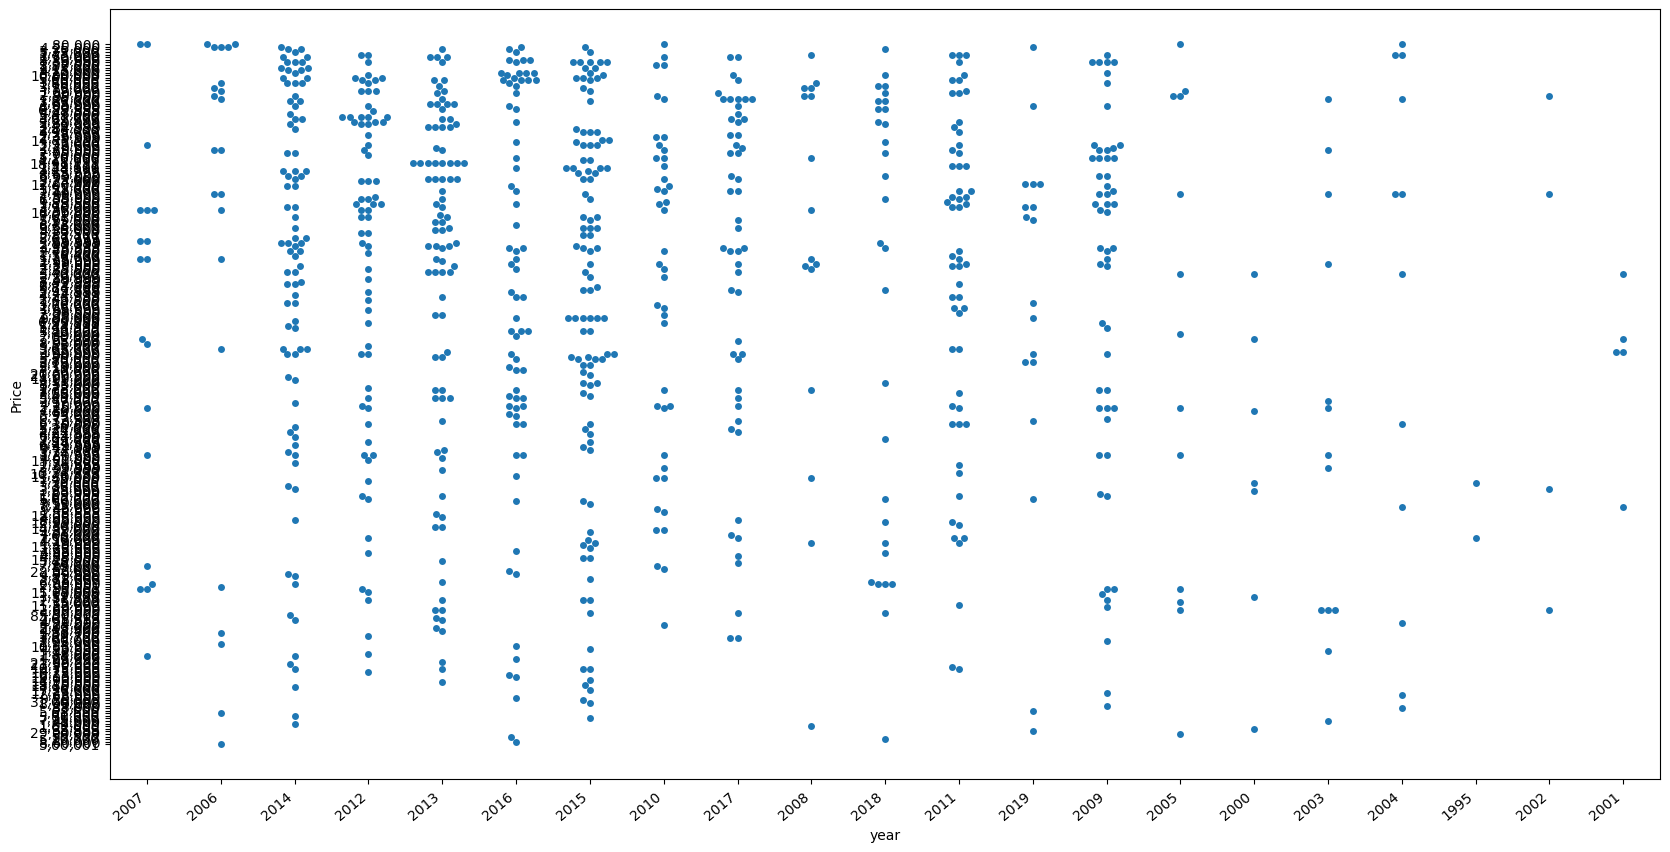

In [114]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='year',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

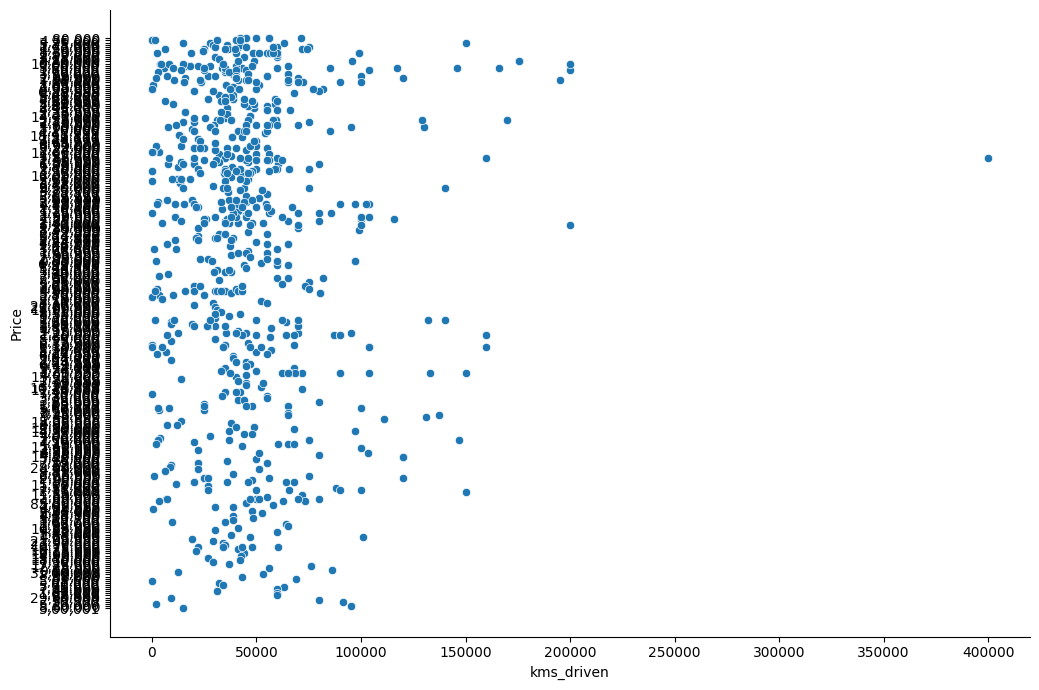

In [115]:
sns.relplot(x='kms_driven',y='Price',data=car,height=7,aspect=1.5)

<Axes: xlabel='fuel_type', ylabel='Price'>

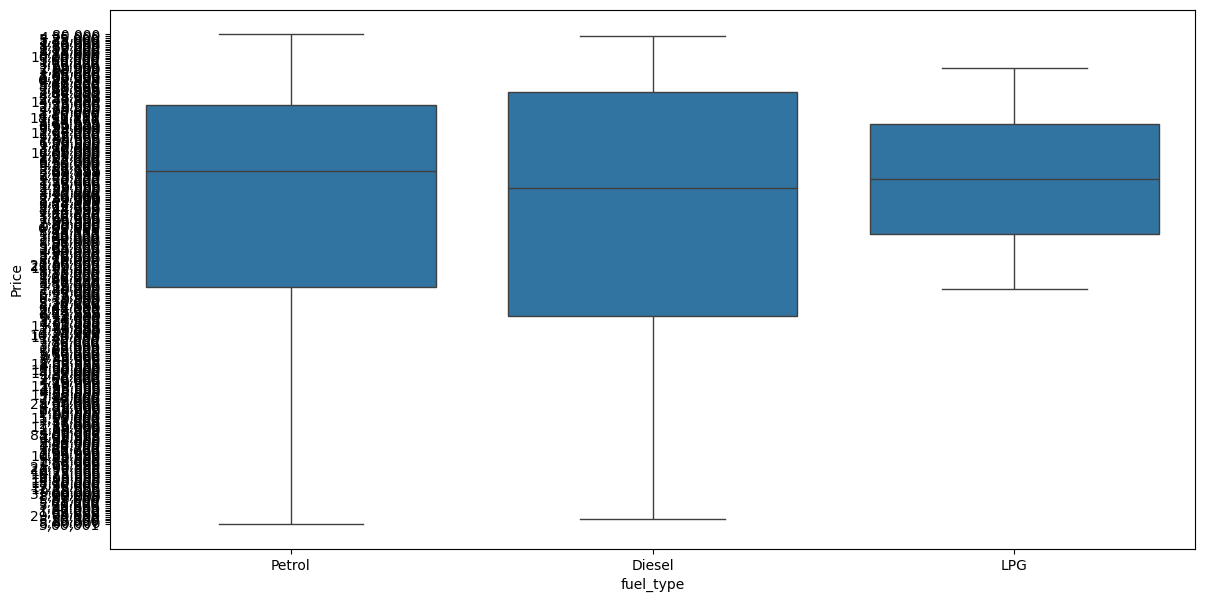

In [116]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel_type',y='Price',data=car)

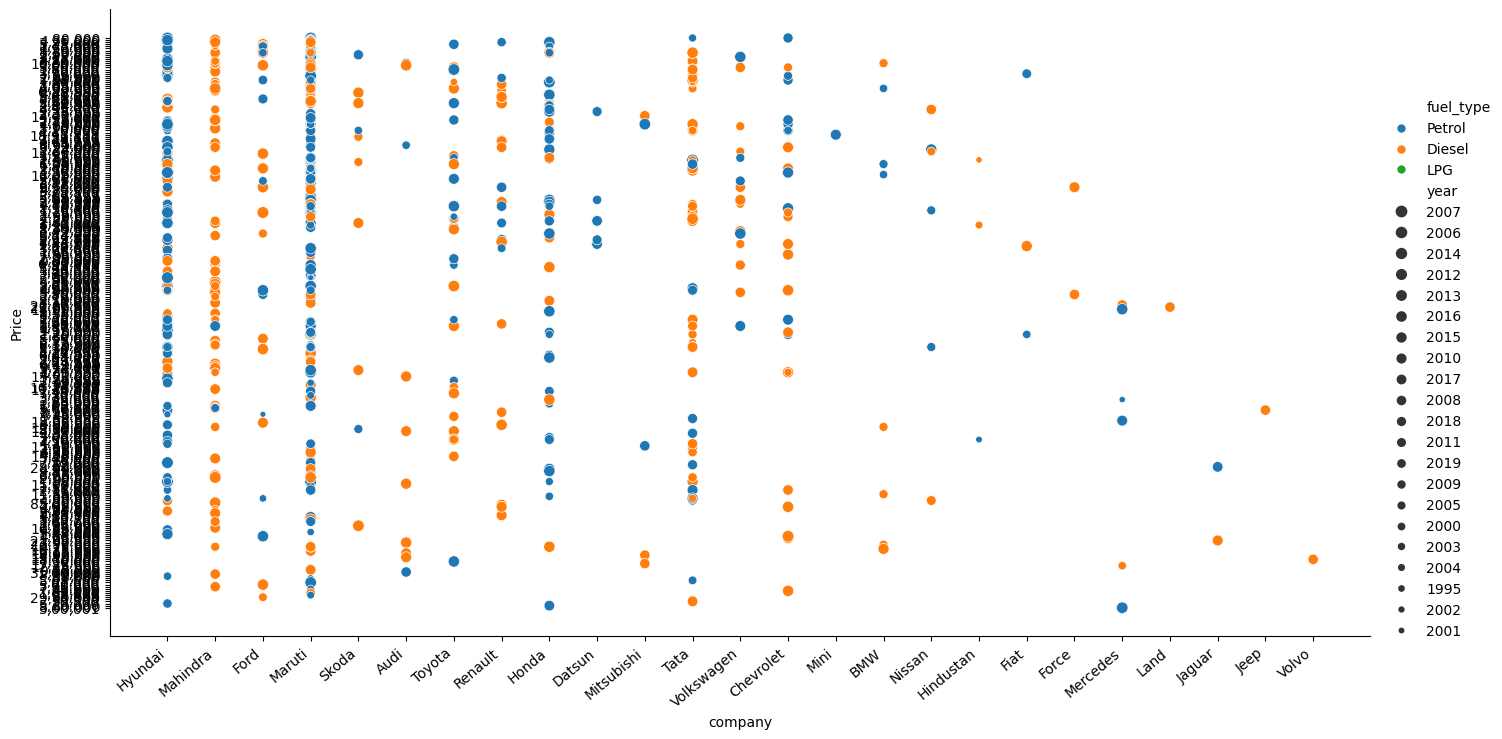

In [117]:
ax=sns.relplot(x='company',y='Price',data=car,hue='fuel_type',size='year',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

In [118]:
X=car[['name','company','year','kms_driven','fuel_type']]
y=car['Price']

In [119]:
X

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel
...,...,...,...,...,...
812,Maruti Suzuki Ritz,Maruti,2011,50000,Petrol
813,Tata Indica V2,Tata,2009,30000,Diesel
814,Toyota Corolla Altis,Toyota,2009,132000,Petrol
815,Tata Zest XM,Tata,2018,27000,Diesel


In [120]:
y.shape

(817,)

## Applying Train Test Split

In [121]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [122]:
from sklearn.linear_model import LinearRegression

In [123]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

## Creating an OneHotEncoder object to contain all the possible categories

In [124]:
ohe=OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

,categories,'auto'
,drop,None
,sparse_output,True
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [125]:
# Creating a column transformer to transform categorical columns

In [126]:

column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                    remainder='passthrough')

# linear regression model

In [127]:
lr=LinearRegression()

In [128]:
# making pipeline

In [129]:
pipe=make_pipeline(column_trans,lr)

In [130]:
# fiting model

In [179]:
pipe.fit(X_train,y_train)

,steps,"[('columntransformer', ...), ('linearregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('onehotencoder', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [180]:
y_pred=pipe.predict(X_test)

In [133]:
# check for r2 score

In [181]:
r2_score(y_test,y_pred)

0.5504768067791965

In [135]:
## Finding the model with a random state of TrainTestSplit where the model was found to give almost 0.92 as r2_score

In [186]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [187]:
np.argmax(scores)

np.int64(39)

In [188]:
scores[np.argmax(scores)]

0.867976820171408

In [189]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([439947.24571489])

## The best model is found at certain random state

In [190]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.867976820171408

In [191]:
import pickle

In [192]:
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))

In [193]:
pipe.predict(pd.DataFrame(columns=['name','company','year','kms_driven','fuel_type'],data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([431085.17928815])

In [194]:
pipe.steps[0][1].transformers[0][1].categories[0]

array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
       'Chevrolet Beat LS', 'Chevrolet Beat LT', 'Chevrolet Beat PS',
       'Chevrolet Cruze LTZ', 'Chevrolet Enjoy', 'Chevrolet Enjoy 1.4',
       'Chevrolet Sail 1.2', 'Chevrolet Sail UVA', 'Chevrolet Spark',
       'Chevrolet Spark 1.0', 'Chevrolet Spark LS', 'Chevrolet Spark LT',
       'Chevrolet Tavera LS', 'Chevrolet Tavera Neo', 'Datsun GO T',
       'Datsun Go Plus', 'Datsun Redi GO', 'Fiat Linea Emotion',
       'Fiat Petra ELX', 'Fiat Punto Emotion', 'Force Motors Force',
       'Force Motors One', 'Ford EcoSport', 'Ford EcoSport Ambiente',
       'Ford EcoSport Titanium', 'Ford EcoSport Trend',
       'Ford Endeavor 4x4', 'Ford Fiesta', 'Ford Fiesta SXi', 'Ford Figo',
       'Ford Figo Diese